In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("data/2021-01-03-section.json")
df.sample(10)

prefix_href                member_href    username  \
1221   forums/8/?prefix_id=18    members/kagome94.72814/    kagome94   
7787   forums/8/?prefix_id=18   members/sarventos.16296/   Sarventos   
8660   forums/8/?prefix_id=18  members/1186446100.31279/  1186446100   
6152   forums/8/?prefix_id=18   members/hotfinwax.48330/   hotfinwax   
273    forums/8/?prefix_id=18   members/astroolam.77540/   AstroOlam   
12725  forums/8/?prefix_id=18        members/twibs.8079/       Twibs   
2307   forums/8/?prefix_id=18    members/nbkiller.67990/    NBkiller   
11800  forums/8/?prefix_id=18   members/greinkecy.15328/   GreinkeCY   
2860   forums/8/?prefix_id=18         members/doo.14445/         Doo   
6928   forums/8/?prefix_id=18        members/3coin.9198/       3coin   

         start_date                       thread_href             title  \
1221   Jun 10, 2020       threads/baln-appeal.162960/       Baln appeal   
7787    Sep 6, 2016           threads/self-ban.77164/          Self ban   
8660    Oct 5, 2016         threads/ban-appeal.79588/        ban appeal   
6152    Jan 4, 2018        threads/ban-appeal.112724/        Ban appeal   
273     Nov 7, 2020        threads/ban-appeal.177589/        Ban Appeal   
12725  Jan 18, 2015         threads/ban-appeal.19056/        Ban Appeal   
2307   Feb 19, 2020        threads/ban-appeal.151113/        Ban Appeal   
11800  Aug 30, 2015         threads/ban-appeal.36522/        Ban Appeal   
2860   Sep 18, 2019  threads/self-ban-request.144953/  Self ban Request   
6928   Aug 31, 2017        threads/ban-appeal.101539/        Ban Appeal   

       replies  views  
1221         7   3432  
7787         5    913  
8660        22   1986  
6152         4   1010  
273         10   2249  
12725        2    530  
2307         9    667  
11800        3    411  
2860         1    795  
6928        18   2490

In [2]:
len(df.thread_href.unique())

14337

In [3]:
len(df.username.unique())

10363

In [4]:
df.groupby("username").count().sort_values(by="views", ascending=False).views

username
songxin         12
hank20000323    12
camello         11
jesus           10
87Karlos        10
                ..
Ray H            1
Ray              1
RawrCake         1
Rawda            1
黃韋誠              1
Name: views, Length: 10363, dtype: int64

In [5]:
df[["thread_href", "start_date"]][df.start_date.isnull()]

thread_href start_date
0         threads/ban-appeal.181629/       None
1         threads/ban-appeal.181638/       None
5         threads/ban-appeal.181644/       None
6         threads/ban-appeal.181595/       None
8   threads/self-ban-request.181590/       None
9  threads/logging-in-issues.181506/       None

In [6]:
df["start_date_dt"] = pd.to_datetime(df.start_date, infer_datetime_format=True)
df[["thread_href", "start_date"]]

thread_href    start_date
0           threads/ban-appeal.181629/          None
1           threads/ban-appeal.181638/          None
2           threads/ban-appeal.178882/  Nov 24, 2020
3           threads/ban-appeal.181157/  Dec 24, 2020
4               threads/banned.181351/  Dec 26, 2020
...                                ...           ...
14332          threads/ban-appeal.354/   Jun 2, 2013
14333  threads/banned-matt-help-d.351/   Jun 1, 2013
14334         threads/unknown-ban.346/  May 31, 2013
14335  threads/why-my-acc-get-ban.342/  May 31, 2013
14336         threads/ban-problem.287/  May 25, 2013

[14337 rows x 2 columns]

In [7]:
df["month"] = df.start_date_dt.astype('<M8[M]')
df.month

0              NaT
1              NaT
2       2020-11-01
3       2020-12-01
4       2020-12-01
           ...    
14332   2013-06-01
14333   2013-06-01
14334   2013-05-01
14335   2013-05-01
14336   2013-05-01
Name: month, Length: 14337, dtype: datetime64[ns]

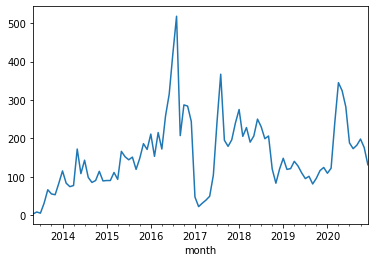

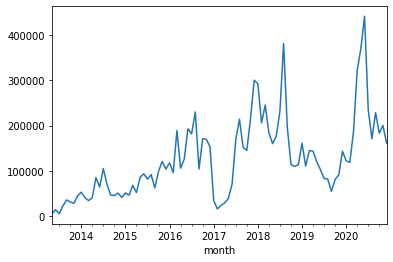

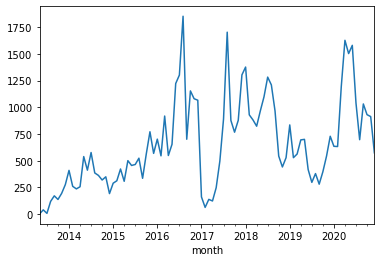

In [8]:
df[~df.month.isnull()].groupby("month").count().title.plot()
plt.show()
df[~df.month.isnull()].groupby("month").sum().views.plot()
plt.show()
df[~df.month.isnull()].groupby("month").sum().replies.plot()
plt.show()